In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def julia(
    c, xlim, ylim,
    res=500, accuracy=10,
    cmap='hsv', savefig=False, title=None
):
    """
    Creates an image of the julia set for Q_c(z) = z^2 + c
    
    Parameters:
        c (complex): the parameter for the qudratic map
        xlim (tuple): the x-limits of the graph
        ylim (tuple): the y-limits of the graph
        res (int): the square root of the number of grid points
        accuracy (int): the number of iterations to check
    
    Returns:
        (None): displays image with no return value
    """
    
#     define our function
    def _quad(z):
        '''The quadritic map'''
        return np.power(z,2) + c
    
#     here we create our domain
    x = np.linspace(xlim[0],xlim[1], res)
    y = np.linspace(ylim[0],ylim[1], res)
    X,Y = np.meshgrid(x,y)
    
#     this is the variable we will use to understand the shape
#     of the julia set
#     think of this as a portion of the complex plane
    Z = X + 1j*Y
    
#     this will help us color the image later
#     it counts how long it takes each point to escape
    escape = np.zeros((res,res), dtype=int)
    
    for i in range(accuracy):
#         iterate the function
        Z = _quad(Z)
        
#         update escape values
        mask = np.abs(Z) > 2
        escape[mask] = i+1 #- np.log(np.log(np.abs(Z[mask]))) / np.log(2)
        Z[mask] = None
        
#     now we plot the Julia set

#     these variables are for the coloring
    cmap = plt.get_cmap(cmap)
    vmax = np.max(escape)
    cmap.set_bad(color='black')
    
#     resize the image so we can see it
    plt.figure(figsize=(20,20))
    
#     plot the image
    plt.pcolormesh(
        X,Y,escape,
        shading='gouraud',
        norm=col.LogNorm(vmin=1, vmax=vmax),
        cmap=cmap
    )
#     plt.axis('off')
    if savefig:
        plt.savefig(title)
        
    plt.gca().axis('image')
    plt.show()
    
                
    
    return

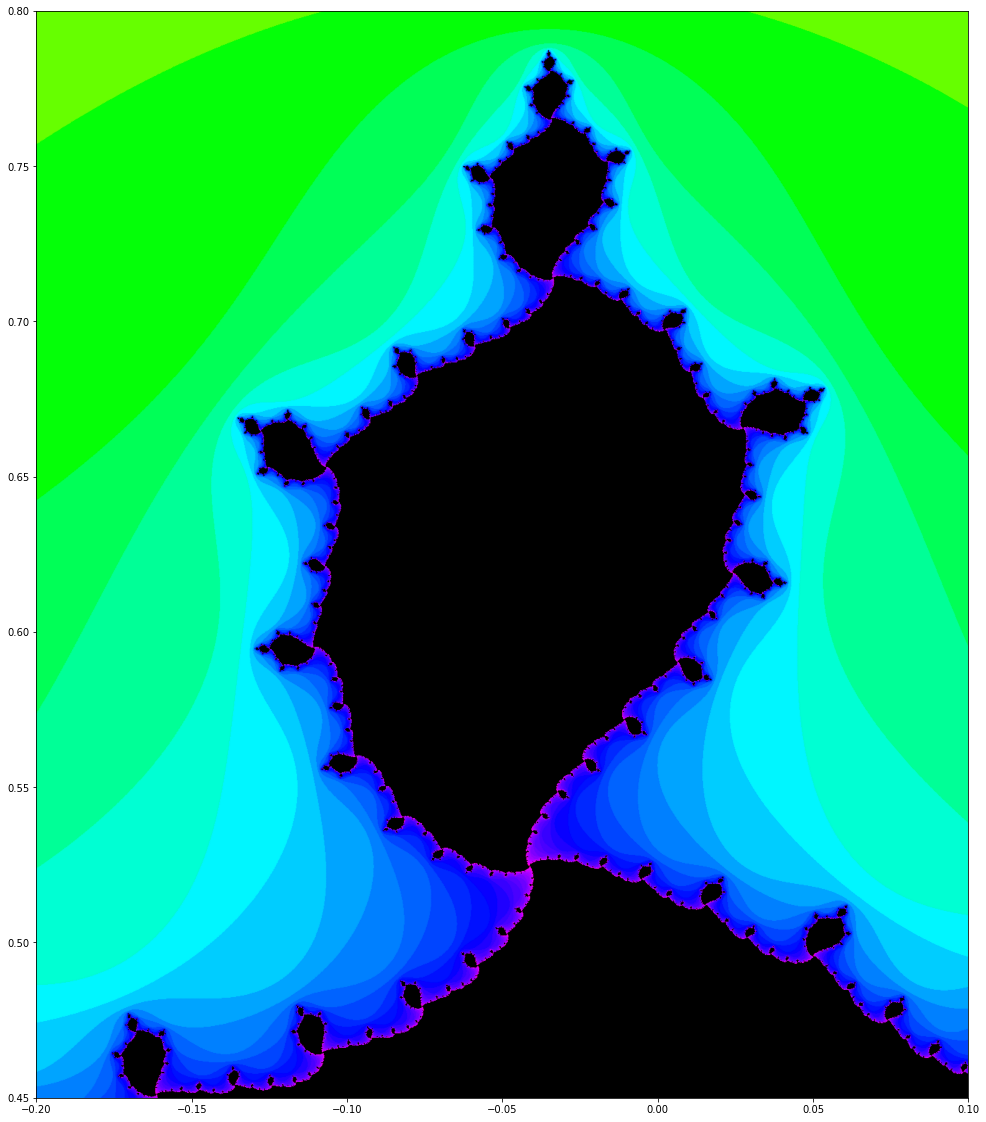

In [4]:
# this is a zoom on a certain feature of the julia set generated
# by c = -1 + .1i
# the image is fairly high in detail becuse the resolution is 1500,
# so there are 2250000 points calculated in a grid
julia(
    complex(-1,.1), (-.2,.1), (.45,.8), 1500, 100,
    savefig=True, title='julia_set'
)

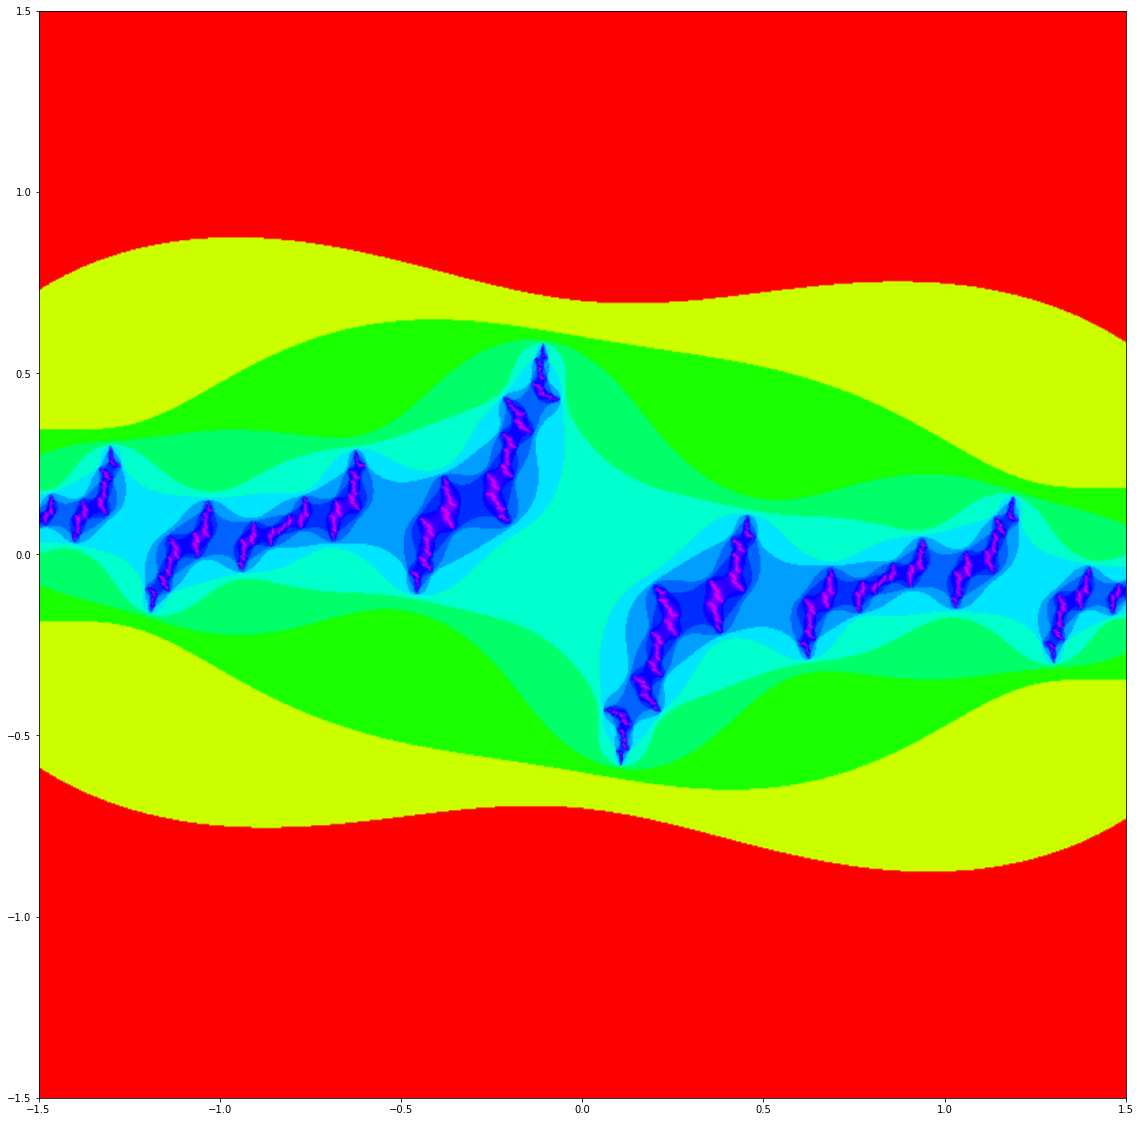

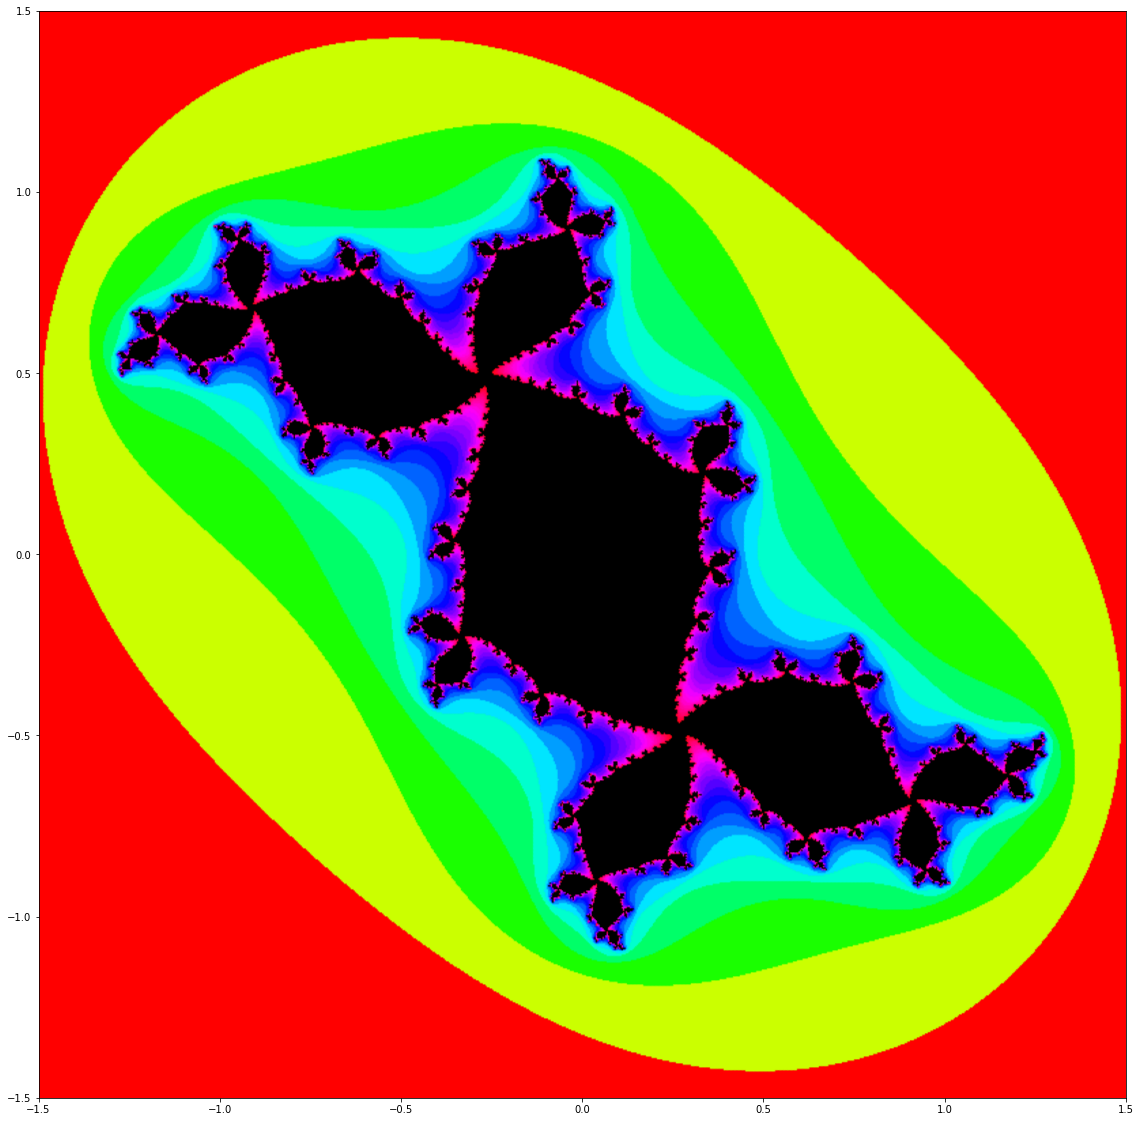

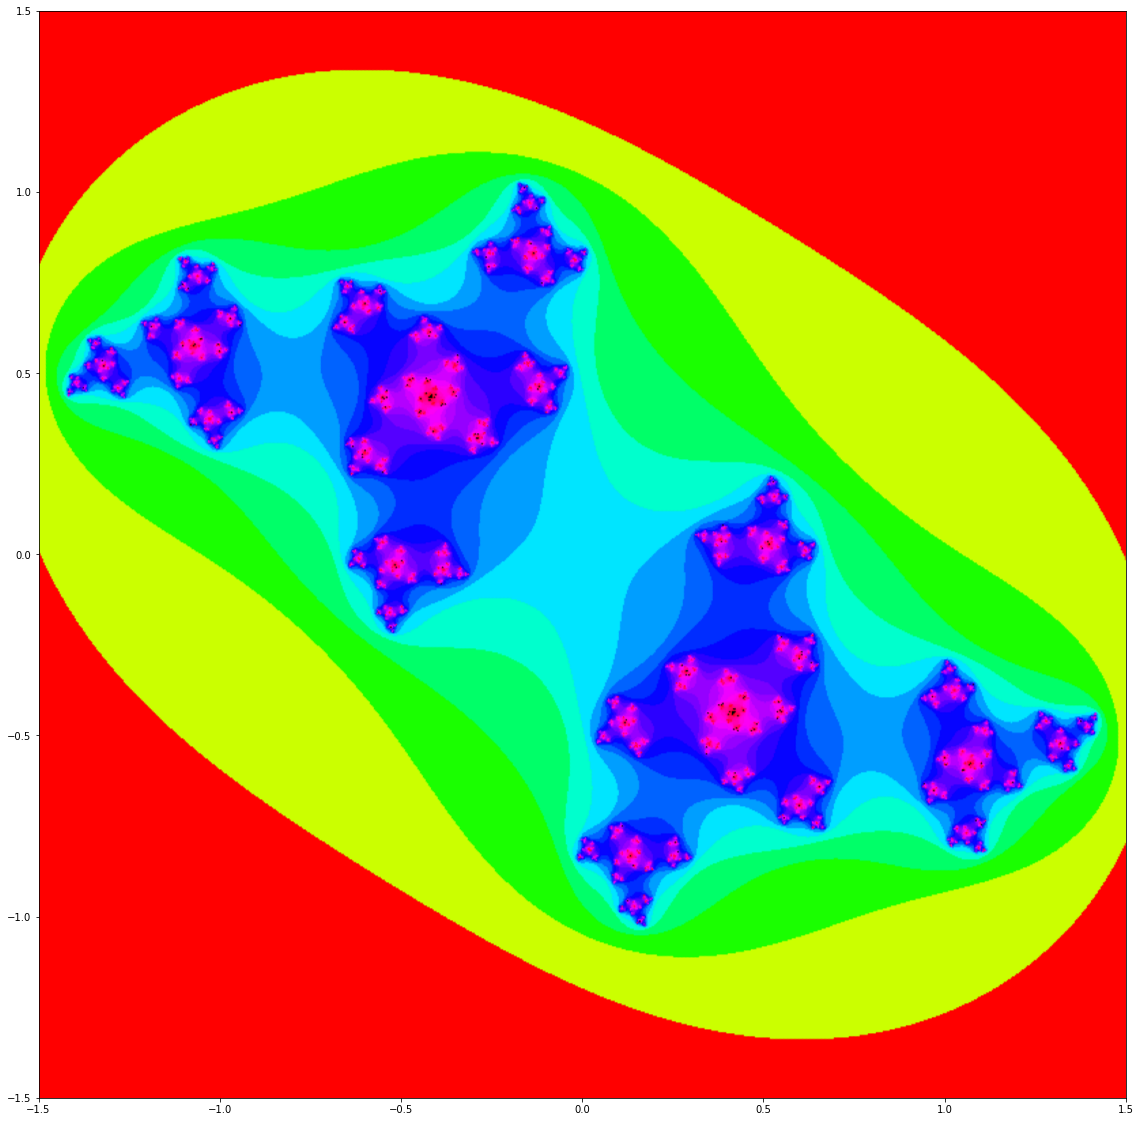

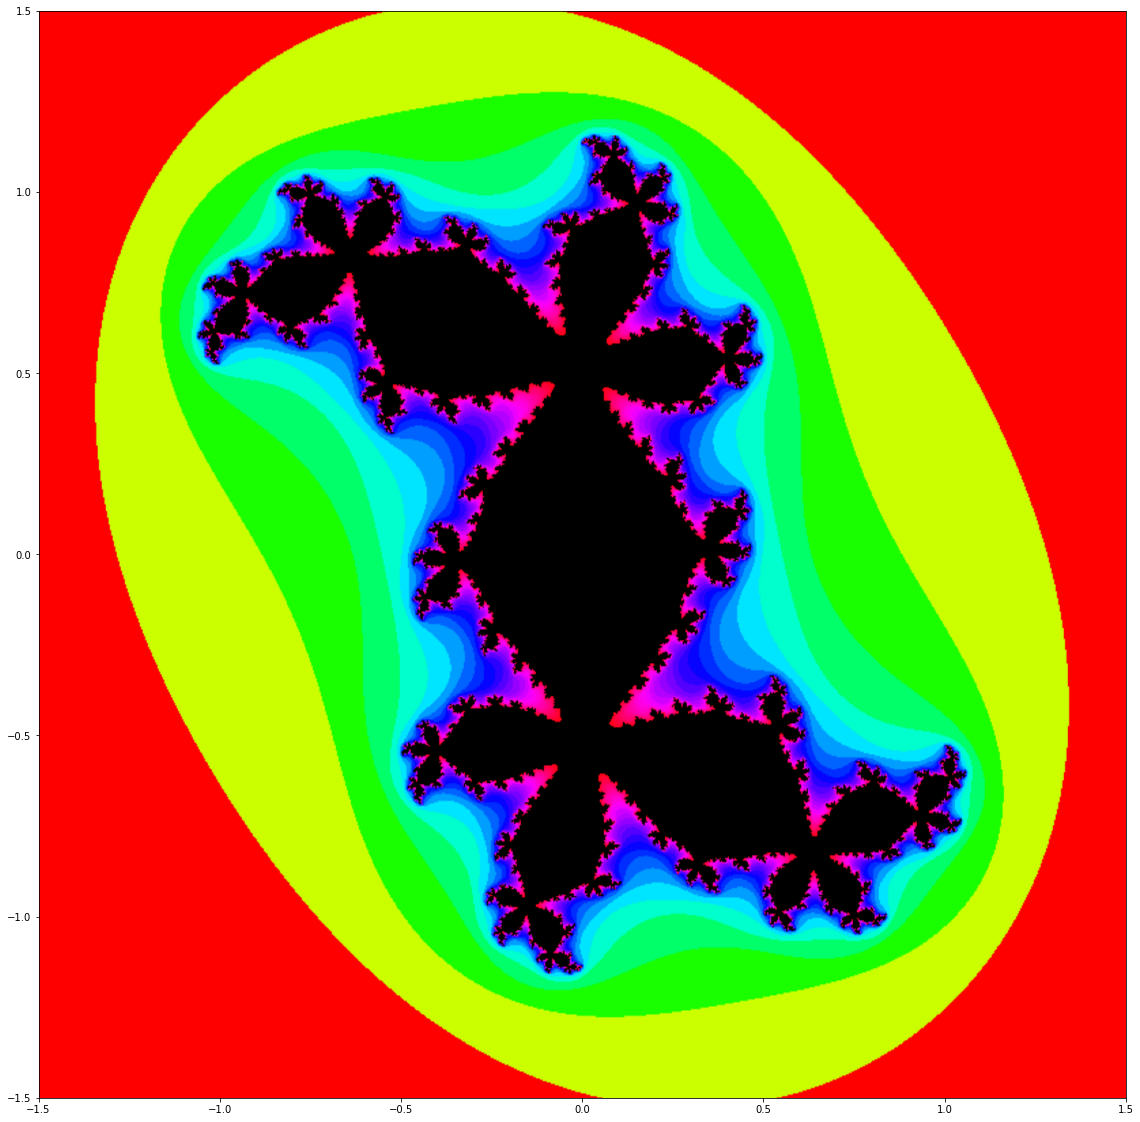

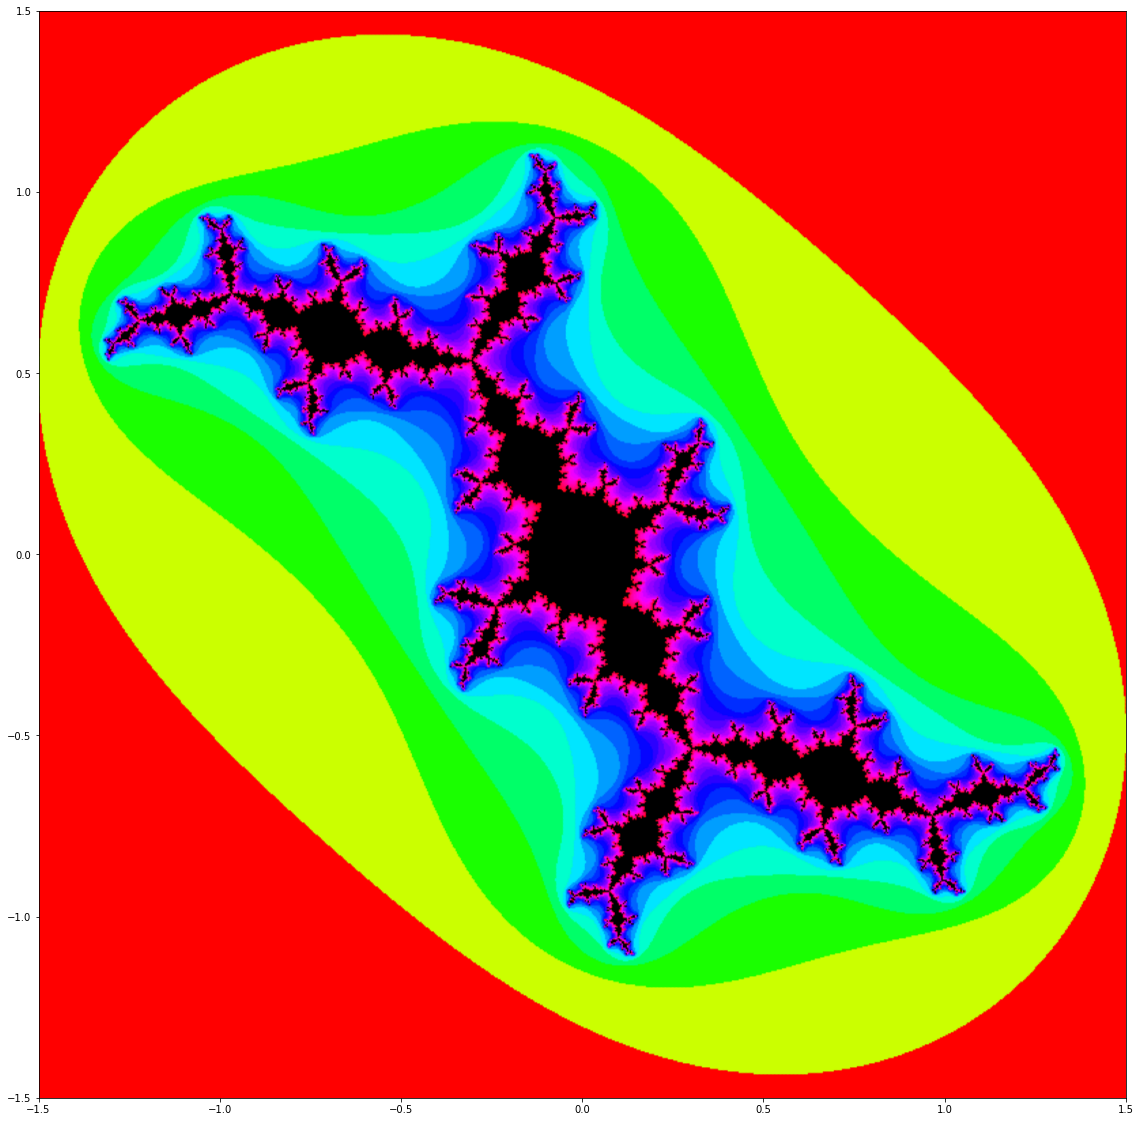

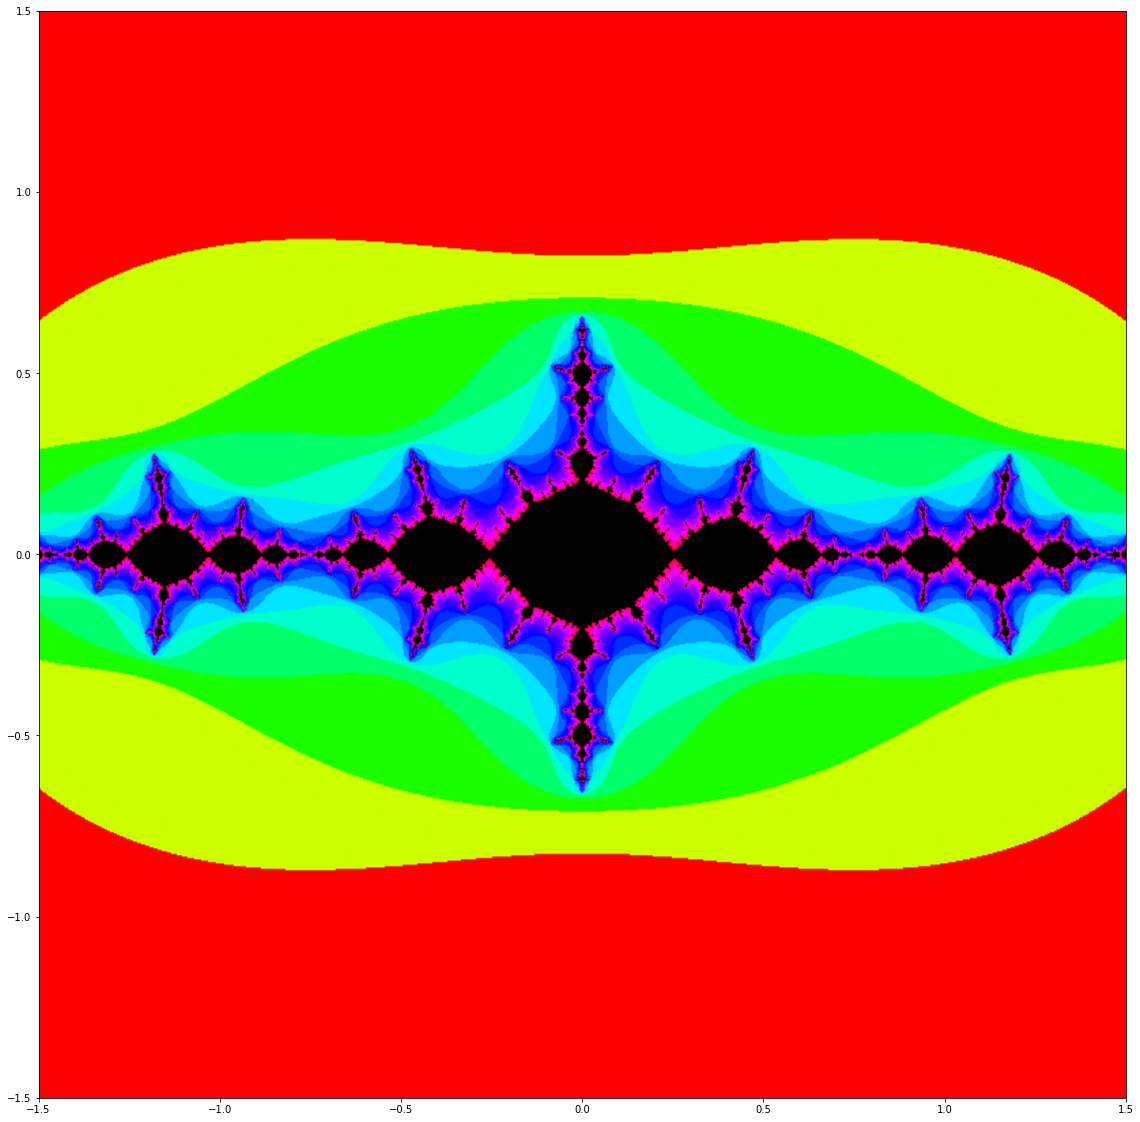

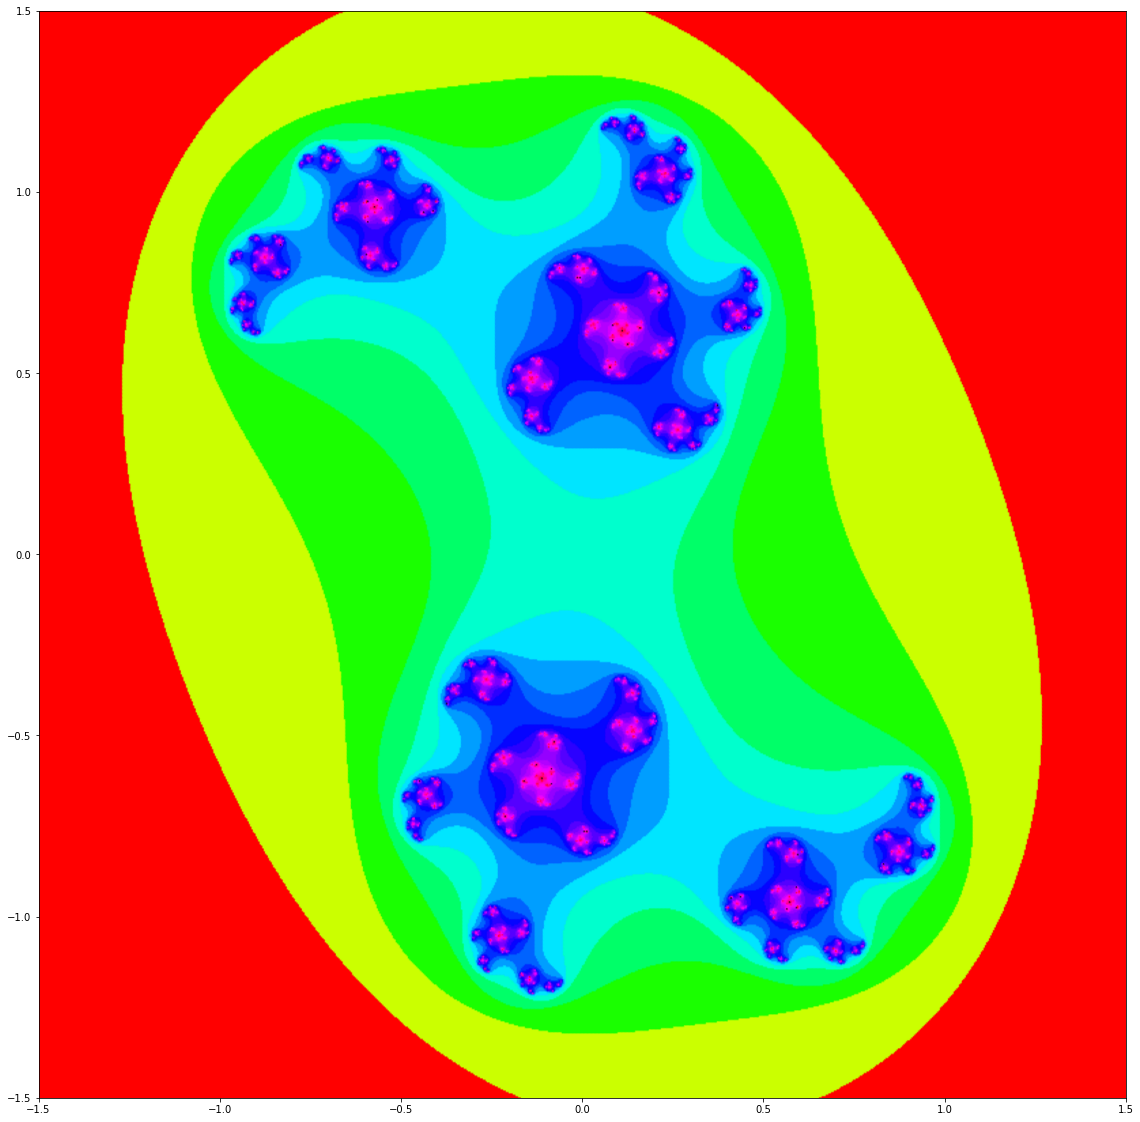

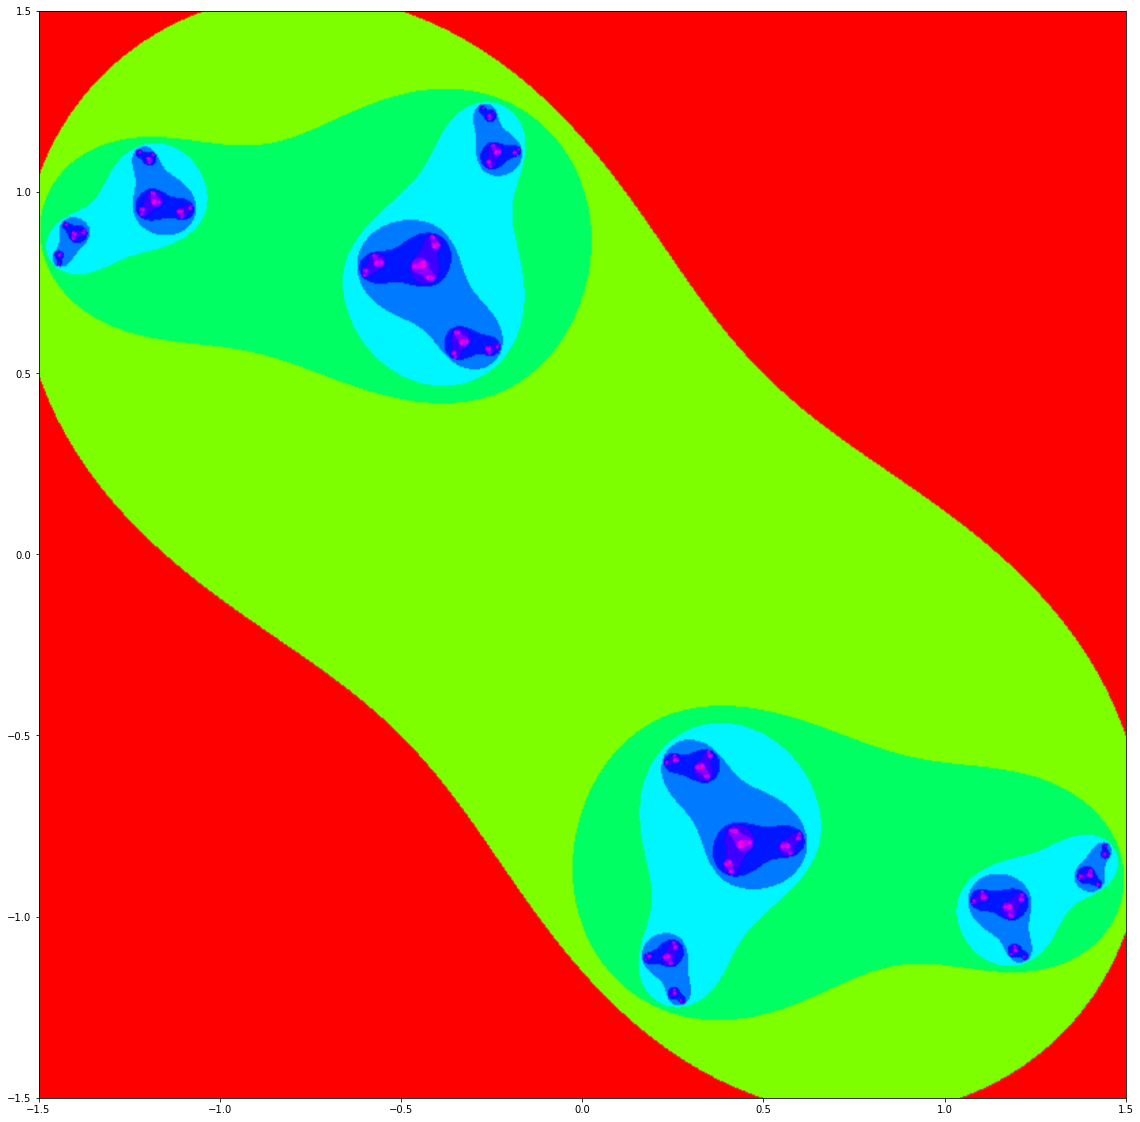

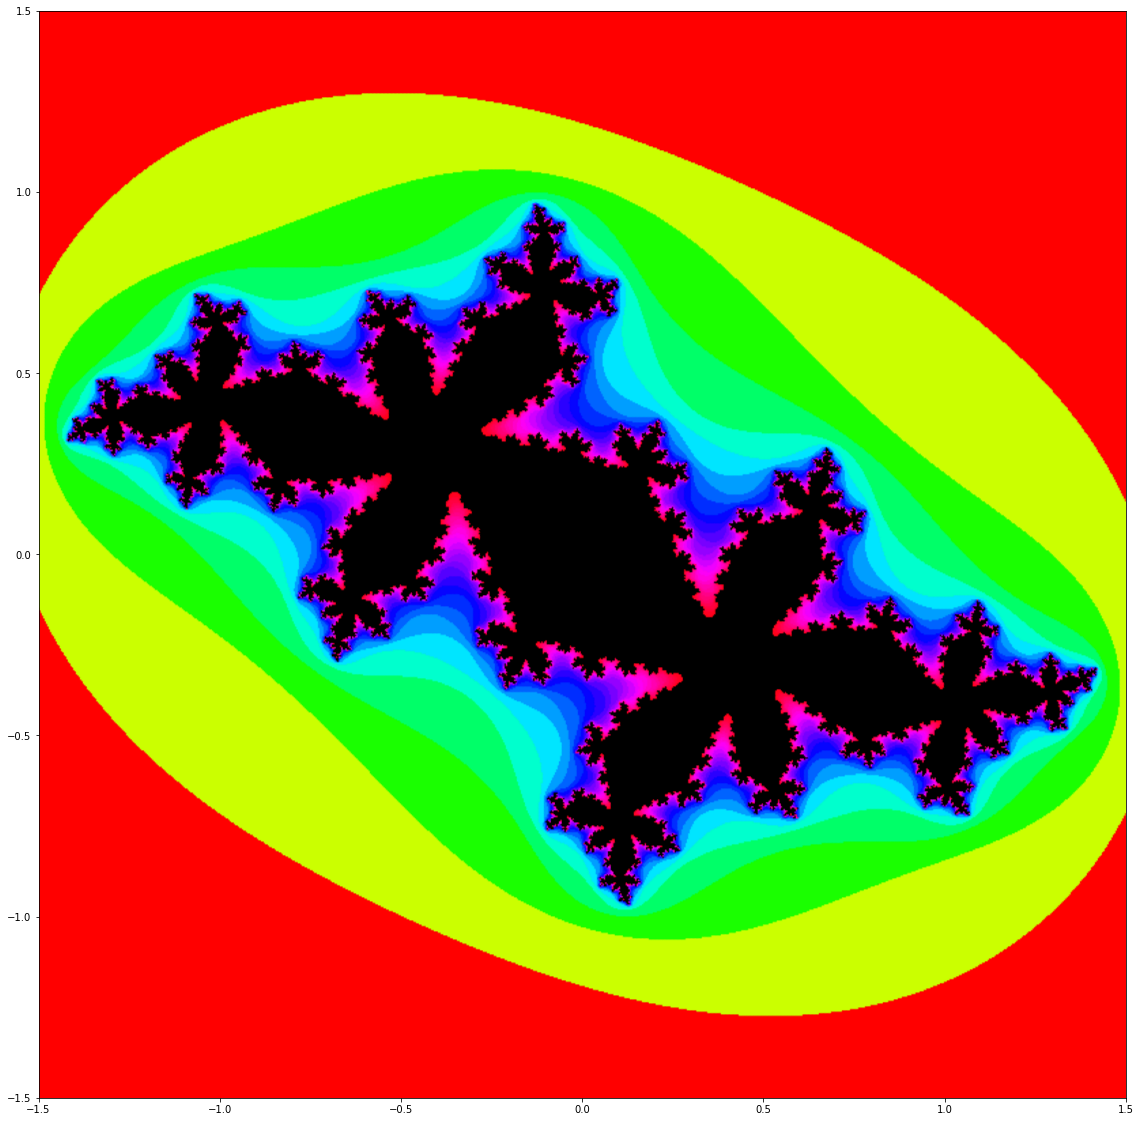

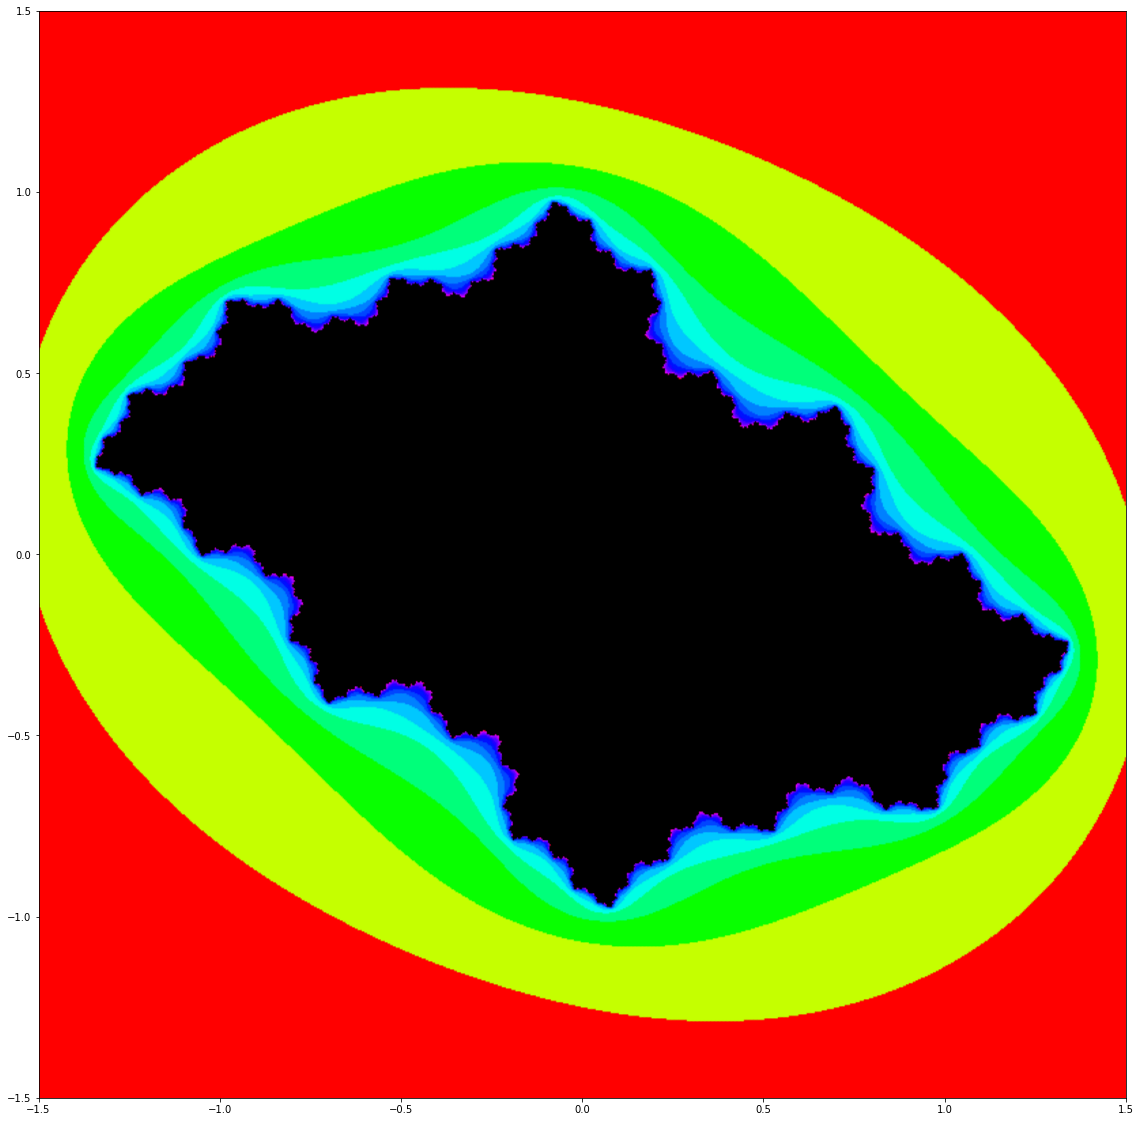

In [5]:
cs = [
    (-1.5, .2),(-.1,.75),(-.4,.8),(.28,.53),(-.11,.86),
    (-1.32,0),(.48,.48),(0,1.5),(-.5,.57),(-.4,.4)
]
for c in cs:
    c = complex(c[0],c[1])
    julia(c, (-1.5,1.5), (-1.5,1.5), 800, 30)    

In [49]:
def burning_ship(
    xlim, ylim,
    res=500, accuracy=10,
    cmap='hsv', savefig=False, title=None
):
    """
    Creates an image of the julia set for Q_c(z) = z^2 + c
    
    Parameters:
        c (complex): the parameter for the qudratic map
        xlim (tuple): the x-limits of the graph
        ylim (tuple): the y-limits of the graph
        res (int): the square root of the number of grid points
        accuracy (int): the number of iterations to check
    
    Returns:
        (None): displays image with no return value
    """
    
#     define our function
#     def _quad(z):
#         '''The quadritic map'''
#         return np.power(z,2) + c
    def gen_ship(c):
        
        def _ship(z):
            return np.power(np.abs(np.real(z)) + 1j*np.abs(np.imag(z)), 2) - c
        return _ship
    
    
#     here we create our domain
    x = np.linspace(xlim[0],xlim[1], res)
    y = np.linspace(ylim[0],ylim[1], res)
    X,Y = np.meshgrid(x,y)
    
#     this is the variable we will use to understand the shape
#     of the julia set
#     think of this as a portion of the complex plane
    C  = X + 1j*Y
    Z = np.zeros_like(C)
    
#     this will help us color the image later
#     it counts how long it takes each point to escape
    escape = np.zeros((res,res), dtype=int)
    
    for i in range(accuracy):
#         iterate the function
        Z = np.power(np.abs(np.real(Z)) + 1j*np.abs(np.imag(Z)), 2) - C
        
#         update escape values
        mask = np.abs(Z) > 2
        escape[mask] = i+1 #- np.log(np.log(np.abs(Z[mask]))) / np.log(2)
        Z[mask] = None
        
#     now we plot the Julia set

#     these variables are for the coloring
    cmap = plt.get_cmap(cmap)
    vmax = np.max(escape)
    cmap.set_bad(color='white')
    
#     resize the image so we can see it
    plt.figure(figsize=(20,20))
    
#     plot the image
    plt.pcolormesh(
        X,Y,escape,
        shading='gouraud',
        norm=col.LogNorm(vmin=1, vmax=vmax),
        cmap=cmap
    )
#     plt.axis('off')
    if savefig:
        plt.savefig(title)
        
    plt.gca().axis('image')
    plt.show()
    
                
    
    return

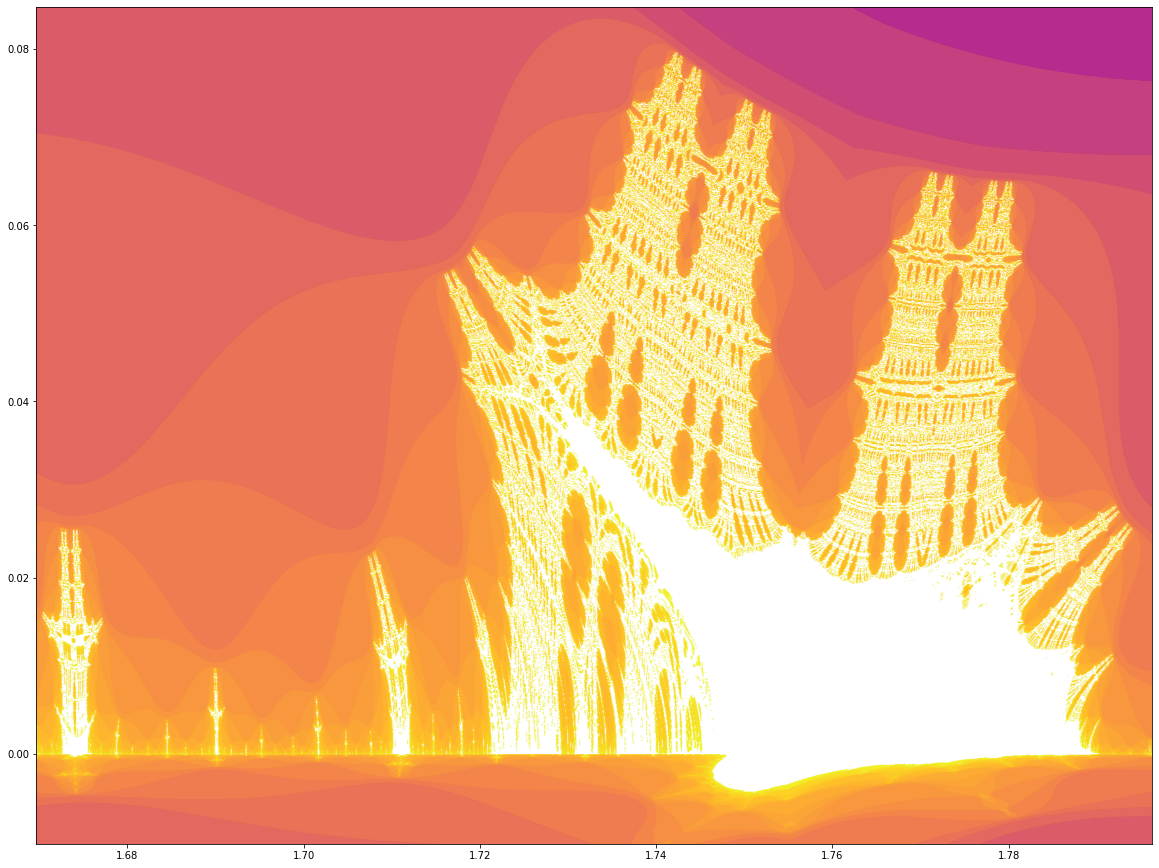

In [53]:
burning_ship(
    (1.6696564650632193,1.7963231317298858), (-0.0102208711174155, 0.0847791288825845),
    1500, 30, cmap='plasma',
    savefig=True, title='plasma_burning_ship'
)  

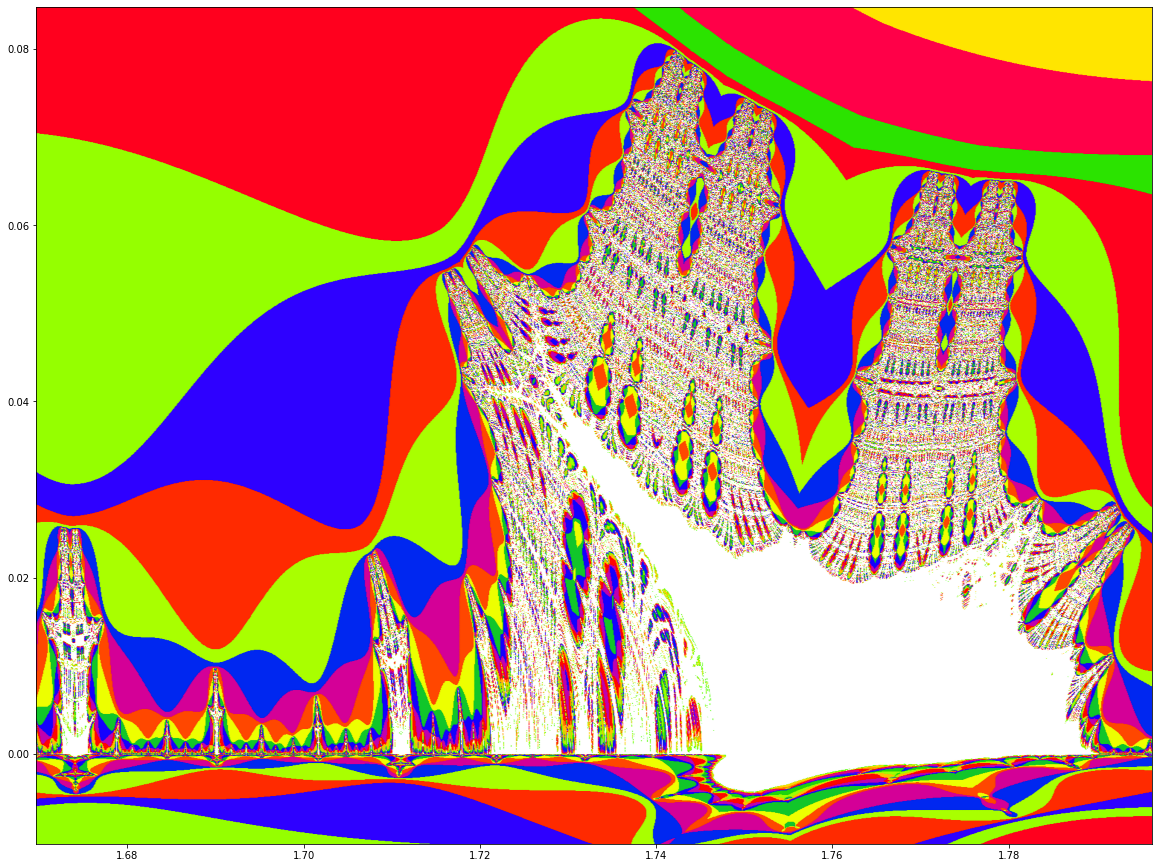

In [54]:
burning_ship(
    (1.6696564650632193,1.7963231317298858), (-0.0102208711174155, 0.0847791288825845),
    1500, 30, cmap='prism',
    savefig=True, title='prism_burning_ship'
) 